<a href="https://colab.research.google.com/github/NickLawrence0025/TTA-Home-Learning/blob/main/Multiple_linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Read the csv into a dataframe:

In [34]:
honey_df = pd.read_csv('honeyproduction.csv')

Examine the top five rows to see the data types and columns.

In [35]:
honey_df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


Determine the learning data and the target data. Here, I will be examining which factors determine the produce value ('prodvalue') 

In [36]:
x = honey_df[['numcol','yieldpercol', 'totalprod','stocks','priceperlb','year']]
y = honey_df[['prodvalue']]

Split the x and y variables into a training and test set. 80% of the data will be for training, and the trained model will be tested on the remaining 20%

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

Print the shape of each variable to confirm that this has been split correctly.

In [38]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(500, 6)
(126, 6)
(500, 1)
(126, 1)


Set the model as LinearRegression then fit it to the training data. Set a variable of predictions (y_predict)

In [39]:
mlr = LinearRegression()
model = mlr.fit(x_train,y_train)
y_predict = mlr.predict(x_test)

Create a scatter plot that compares the predicted results for the test set, and the actual results. 

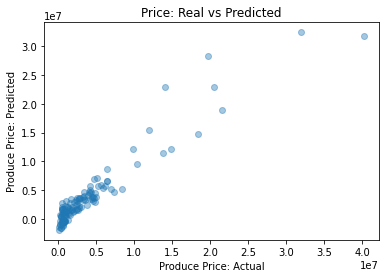

In [40]:
plt.scatter(y_test,y_predict,alpha=0.4)
plt.xlabel("Produce Price: Actual")
plt.ylabel("Produce Price: Predicted")
plt.title("Price: Real vs Predicted")
plt.show()

Here we can see that past around 1.0, the difference between actual and predicted produce price becomes larger (and harder to predict)
At this point, it's a good idea to measure the coefficiency of the each variable 

In [41]:
mlr.coef_

array([[ 3.38125452e+01,  7.63547628e+03,  8.79248790e-01,
        -7.87887223e-01,  6.64131290e+05,  2.42657672e+05]])

Hard to determine without a visual, however num_col, total_prod and stocks seem to have a stronger coefficency with prod_value. 
A number of scatter plots will give a better idea. 

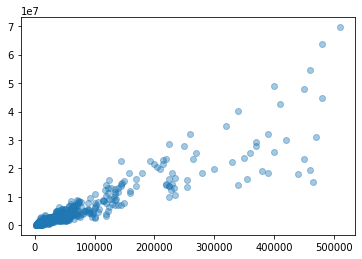

<Figure size 432x288 with 0 Axes>

In [42]:
plt.scatter(honey_df[['numcol']], honey_df[['prodvalue']], alpha=0.4)

plt.show()
plt.clf()

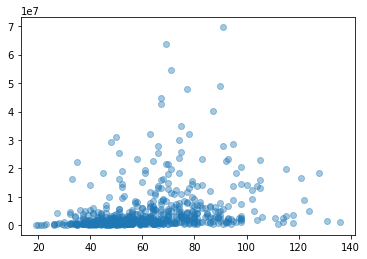

<Figure size 432x288 with 0 Axes>

In [43]:
plt.scatter(honey_df[['yieldpercol']], honey_df[['prodvalue']], alpha=0.4)

plt.show()
plt.clf()

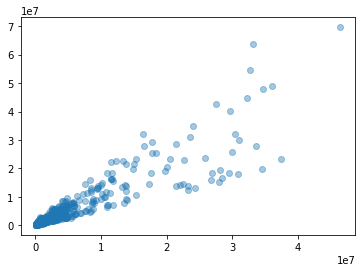

<Figure size 432x288 with 0 Axes>

In [44]:
plt.scatter(honey_df[['totalprod']], honey_df[['prodvalue']], alpha=0.4)

plt.show()
plt.clf()

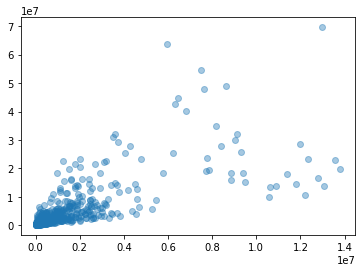

<Figure size 432x288 with 0 Axes>

In [45]:
plt.scatter(honey_df[['stocks']], honey_df[['prodvalue']], alpha=0.4)

plt.show()
plt.clf()

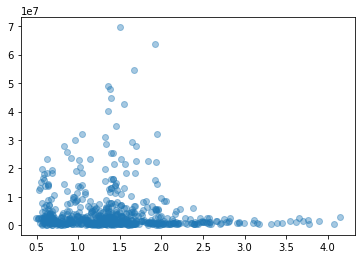

<Figure size 432x288 with 0 Axes>

In [46]:
plt.scatter(honey_df[['priceperlb']], honey_df[['prodvalue']], alpha=0.4)

plt.show()
plt.clf()

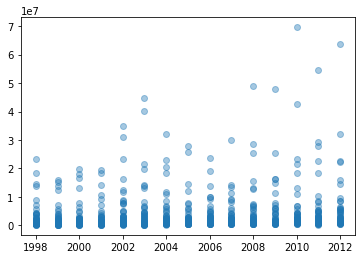

<Figure size 432x288 with 0 Axes>

In [47]:
plt.scatter(honey_df[['year']], honey_df[['prodvalue']], alpha=0.4)

plt.show()
plt.clf()

Total produced and number of colonies is strongly correlated with produce value. However, we can score the current model with the features currently used, and use it as base line for potential improvement. 

Train score: 
0.8852603267516944
Test score:
0.9025036143146093


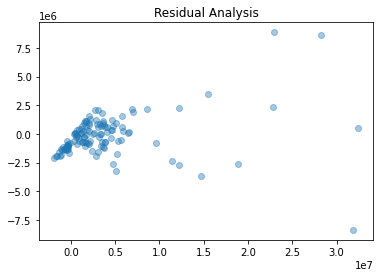

In [48]:
print("Train score: ")
print(model.score(x_train, y_train))

print("Test score:")
print(model.score(x_test, y_test))
residuals = y_predict - y_test
 
plt.scatter(y_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')
 
plt.show()

By looking at the residuals (the absolute differences between training and test set results) we can see that we can predict with the greatest accuracy if the values concerned are between 0.1 and 0.4. 
The insight we gain is that some feature tweaking may help, perhaps removing some of the less correlating features like yieldpercol. 

I have omitted the state series from the model due to it'd data type - so I could encode this data and use it to improve on the predictive score. 